We import all the required dependencies and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer 
import seaborn as sns
from nltk.metrics import edit_distance
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('../../../Code/Data Science/Project/Andhra_Health_Data.csv' or 'Andhra_Health_Data.csv')
# df = pd.read_csv('Andhra_Health_Data.csv')

We remove the 'Sno' coloumn and then remove all the duplicate entries

In [2]:
df = df.drop('Sno', axis=1).drop_duplicates()


We standardize all the sex values as either 'M' (for male) or 'F' (for female)

In [3]:


df['SEX'].replace({"FEMALE": "F", "Female": "F", "Female(Child)": "F", "MALE": "M", "Male": "M", "Male(Child)": "M"}, inplace=True)
df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,56,F,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,06-08-2013 00:00,07-09-2013 00:00,NO,NaN,D
1,37,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,08-08-2013 00:00,09-09-2013 00:00,NO,NaN,D
2,50,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,22-03-2017 20:25,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D
3,45,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,24-08-2013 00:00,27-09-2013 00:00,NO,NaN,D
4,54,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,31-08-2013 00:00,02-10-2013 00:00,NO,NaN,D


In [4]:
for col in df.columns:
    print(col)

AGE
SEX
CASTE_NAME
CATEGORY_CODE
CATEGORY_NAME
SURGERY_CODE
SURGERY
VILLAGE
MANDAL_NAME
DISTRICT_NAME
PREAUTH_DATE
PREAUTH_AMT
CLAIM_DATE
CLAIM_AMOUNT
HOSP_NAME
HOSP_TYPE
HOSP_DISTRICT
SURGERY_DATE
DISCHARGE_DATE
Mortality Y / N
MORTALITY_DATE
SRC_REGISTRATION


In [5]:
dead = df['Mortality Y / N'].value_counts()['YES']
alive = df['Mortality Y / N'].value_counts()['NO']
df['Mortality Y / N'].value_counts()['NO']
print("We can see that " + str(dead) + " people are dead while " + str(alive) + " of the people are found to be alive.")
print("Percent of people dead = " + str(((dead)/(dead + alive))*100))
print("Percent of people alive = " + str(((alive)/(dead + alive))*100))

We can see that 10122 people are dead while 469519 of the people are found to be alive.
Percent of people dead = 2.1103283497449135
Percent of people alive = 97.88967165025508


In [6]:
df['AGE'].unique()

array([ 56,  37,  50,  45,  54,  35,  52,  73,  49,  65,  75,   1,  48,
        57,  55,  74,  31,  68,  72,  66,  42,  63,  26,  59,  58,  69,
        53,  40,  10,  70,  17,  64,  60,  43,  47,  51,   0,  24,  46,
        38,  44,  23,  30,  71,  27,  61,  41,  15,  32,  28,   8,  19,
        14,  16,  62,  67,  22,  13,   3,  85,  33,  21,  12,  20,  11,
        29,  34,  39,  36,  25,  18,  79,   7,  77,   5,   2,   9,  80,
         4,  81,   6,  90,  86,  83,  76,  78,  82,  88,  84,  92,  89,
        96,  91,  87,  95,  94,  93, 100, 101, 107,  97,  99])

In [7]:
df['CASTE_NAME'].unique()

array(['BC', 'OC', 'SC', 'Minorities', 'ST', 'Others'], dtype=object)

In [8]:
df['VILLAGE'].unique()

array(['Lolugu', 'Borivanka', 'Kapasakuddi', ...,
       'G.Palavalasa@T.V.P.Vala', 'Boithala', 'Koturupalle'], dtype=object)

In [9]:
df['CATEGORY_NAME'].unique()

array(['NEPHROLOGY', 'CARDIAC AND CARDIOTHORACIC SURGERY', 'CARDIOLOGY',
       'COCHLEAR IMPLANT SURGERY', 'ORTHOPEDIC  SURGERY AND PROCEDURES',
       'MEDICAL ONCOLOGY', 'PEDIATRICS',
       'GYNAECOLOGY AND OBSTETRICS  SURGERY', 'RADIATION ONCOLOGY',
       'GENITO URINARY SURGERIES', 'NEUROLOGY', 'POLY TRAUMA',
       'NEUROSURGERY', 'RHEUMATOLOGY', 'GENERAL SURGERY',
       'GASTROENTEROLOGY', 'PLASTIC SURGERY', 'OPHTHALMOLOGY  SURGERY',
       'PULMONOLOGY', 'GENERAL MEDICINE', 'CRITICAL CARE', 'ENT  SURGERY',
       'ENDOCRINOLOGY', 'SURGICAL ONCOLOGY', 'PEDIATRIC SURGERIES',
       'SURGICAL GASTRO ENTEROLOGY', 'DERMATOLOGY', 'PROSTHESES',
       'INFECTIOUS DISEASES'], dtype=object)

In [10]:
df['SURGERY'].unique()

array(['Maintenance Hemodialysis For Crf',
       'Coronary Balloon Angioplasty with stent(00.45)',
       'Coronary Bypass Surgery', 'Management Of Acute MI With Angiogram',
       'Medical Management of  Refractory Cardiac Failure',
       'Cochlear Implant Surgery',
       'Excision Or Other Operations For Scaphoid Fractures',
       'Chemotherapy for Acute Myeloid Leukemia with Induction Phase',
       'Ablation Therapy for Simple Arrythmias',
       'PTCA 1 Additional Stent (00.46)',
       'Patent Ductus Arterious - Device Closure',
       'Mitral Valve Replacement (With Valve)',
       'Coronary Balloon Angioplasty with Drug eluting stent(00.45)',
       'Medical Management of Term Baby With Severe Perinatal Asphyxia Clinically evident septicemia, Hyperbilirubinem ia - Not requiring Ventilatory support.',
       'Arthroscopy . Operative Meniscectomy',
       'Anterior cruciate ligamentl reconstruction',
       'Vaginal Hysterectomy With Pelvic Floor Repair(70.79)',
       'Lapro

In [11]:
df.isnull().sum()

AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
VILLAGE                  0
MANDAL_NAME              0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469519
SRC_REGISTRATION         0
dtype: int64

<AxesSubplot:>

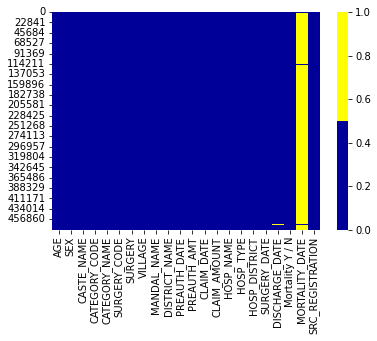

In [12]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [13]:
df['HOSP_NAME'].value_counts()

Sri Venkateswara Institute Of Medical Sciences                                   21854
King George Hospital                                                             13468
BASAVATARAKAM INDO AMERICAN CANCER HOSPITAL and RESEARCH INSTITUTE, Hyderabad    12590
Government General Hospital, Guntur                                              12465
Government General Hospital,Kakinada                                             10264
                                                                                 ...  
SPARK HOSPITALS                                                                      1
Princess Esra Hospital Dcms                                                          1
Ram Hospital, Shapurnagar                                                            1
Dr.Bhoom Reddys Hospital                                                             1
NEW LIFE LINE MULTI SPECIALITY HOSPITAL                                              1
Name: HOSP_NAME, Length: 467, dtype: int64

In [14]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Mortality Y / N: 97.88967%
NO     469519
YES     10122
Name: Mortality Y / N, dtype: int64

MORTALITY_DATE: 97.88967%
NaN                 469519
04-01-2017 00:00        40
10-01-2017 00:00        38
05-12-2016 00:00        37
02-12-2016 00:00        37
                     ...  
18-11-2015 00:00         1
04-12-2015 00:00         1
27-11-2015 00:00         1
02-12-2015 00:00         1
26-11-2017 00:00         1
Name: MORTALITY_DATE, Length: 741, dtype: int64



In [15]:
df_city_ex = pd.DataFrame(data={'VILLAGE': df['VILLAGE'].unique().tolist()})

df_city_ex['city_distance_kothra'] = df_city_ex['VILLAGE'].map(lambda x: edit_distance(x, 'A. Kothapalle'))
# df_city_ex['city_distance_amara'] = df_city_ex['VILLAGE'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,VILLAGE,city_distance_kothra
0,Lolugu,12
1,Borivanka,11
2,Kapasakuddi,12
3,Telikipenta,12
4,Thandemvalasa,12
...,...,...
11796,Buchampalle,7
11797,Rowthulapudi,11
11798,G.Palavalasa@T.V.P.Vala,19
11799,Boithala,9


In [16]:
def remove(string):
    return string.replace(". ", ".")

In [17]:
unique_brand = df['VILLAGE'].unique().tolist()
unique_brand.sort()
for i,v in enumerate(unique_brand):
    v.strip()
    unique_brand[i]=remove(v.lower()).strip()
unique_brand.sort()    
unique_brand

['10th ward',
 '113 thalluru',
 '11th ward',
 '12th ward',
 '13th ward',
 '14th ward',
 '15 th ward',
 '15th ward',
 '16th ward',
 '170.gollapalli',
 '17th ward',
 '184.gollapalle',
 '18th ward',
 '190 ramapuram',
 '197 ramapuram',
 '19th ward',
 '1st  ward',
 '1st ward',
 '1st ward',
 '20th ward',
 '21st ward',
 '21th ward',
 '22nd ward',
 '22th ward',
 '23 rd ward',
 '23rd ward',
 '23th ward',
 '24th ward',
 '25th ward',
 '25th ward',
 '26th ward',
 '26th ward',
 '27th ward',
 '28th ward',
 '29 a.chintamakulapalle',
 '29th ward',
 '2nd  ward',
 '2nd ward',
 '2nd ward',
 '30th ward',
 '31st ward',
 '31th ward',
 '32nd ward',
 '32th ward',
 '33.venkatapuram',
 '33rd ward',
 '33th ward',
 '34th ward',
 '35th ward',
 '36th ward',
 '37th ward',
 '38th ward',
 '38th ward',
 '39th ward',
 '39th ward',
 '3rd  ward',
 '3rd ward',
 '3rd ward',
 '40th ward',
 '40th ward',
 '41st ward',
 '42nd ward',
 '43rd ward',
 '44th ward',
 '48 basivireddipalle',
 '4th  ward',
 '4th ward',
 '4th ward',
 '5.

In [18]:
for cols in df.columns:
    print(cols,len(df[cols].unique()))
    print('-------------------------------------------------')

AGE 102
-------------------------------------------------
SEX 2
-------------------------------------------------
CASTE_NAME 6
-------------------------------------------------
CATEGORY_CODE 29
-------------------------------------------------
CATEGORY_NAME 29
-------------------------------------------------
SURGERY_CODE 925
-------------------------------------------------
SURGERY 923
-------------------------------------------------
VILLAGE 11801
-------------------------------------------------
MANDAL_NAME 711
-------------------------------------------------
DISTRICT_NAME 13
-------------------------------------------------
PREAUTH_DATE 246084
-------------------------------------------------
PREAUTH_AMT 2007
-------------------------------------------------
CLAIM_DATE 4870
-------------------------------------------------
CLAIM_AMOUNT 11465
-------------------------------------------------
HOSP_NAME 467
-------------------------------------------------
HOSP_TYPE 2
---------------

The age of the patients is an important parameter for analysis. The distribution of ages in the sample population is analysed below.

In [19]:
# print the top 10 ages
df['AGE'].value_counts().head(10)

0     17509
50    16191
55    15183
45    15051
60    13730
46    12857
56    12590
51    12469
40    11961
65    11876
Name: AGE, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

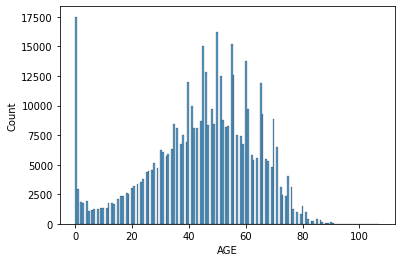

In [20]:
sns.histplot(df['AGE'])

/home/adilj/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

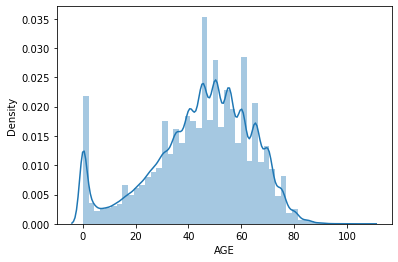

In [21]:
sns.distplot(df['AGE'])

/home/adilj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

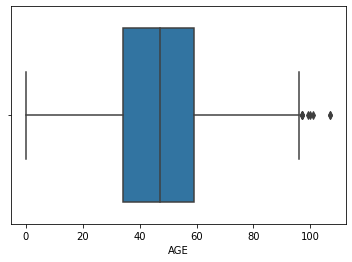

In [22]:
# better looking boxplot (using seaborn) for age variable
sns.boxplot(df['AGE'])

In [23]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(df[df.AGE != 0]['AGE'].mean()))
print("Median: {}".format(df[df.AGE != 0]['AGE'].median()))
print("Mode: {}".format(df[df.AGE != 0]['AGE'].mode()))

Mean: 46.613991240597926
Median: 48.0
Mode: 0    50
Name: AGE, dtype: int64


In [24]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(df['AGE'].mean()))
print("Median: {}".format(df['AGE'].median()))
print("Mode: {}".format(df['AGE'].mode()))

Mean: 44.91237613131488
Median: 47.0
Mode: 0    0
Name: AGE, dtype: int64


<AxesSubplot:title={'center':'Surgeries with Most Fatalities'}, xlabel='SURGERY'>

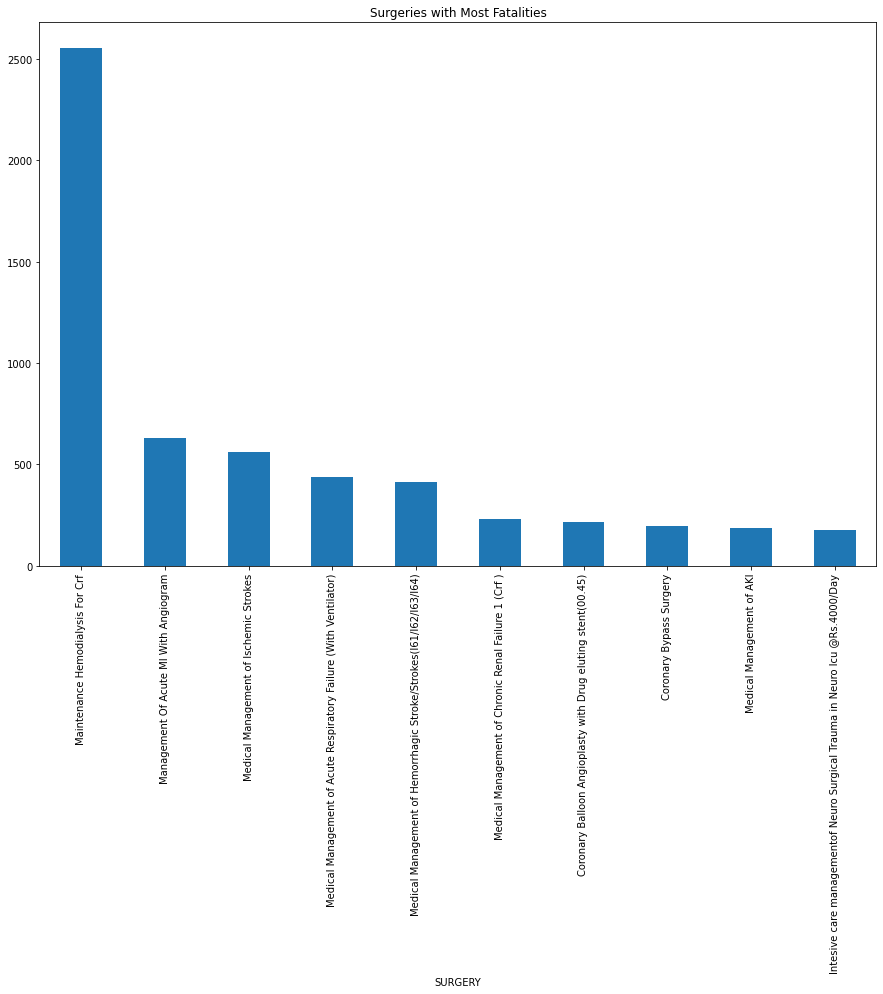

In [25]:
fig = plt.gcf()
fig.set_size_inches(15,10)
fatalities = pd.crosstab(df['SURGERY'],df['Mortality Y / N'])
fatalities.sort_values(by=['YES'],ascending=False)[:10]['YES'].plot.bar(title= 'Surgeries with Most Fatalities')

<AxesSubplot:title={'center':'Age group vs Fatalities'}, xlabel='AGE'>

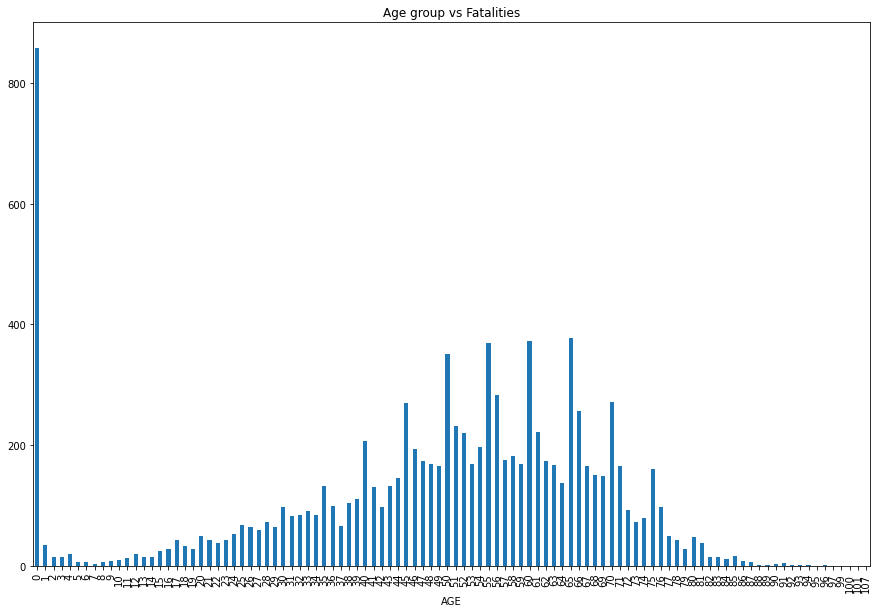

In [26]:
fig = plt.gcf()
fig.set_size_inches(15,10)
fatalities = pd.crosstab(df['AGE'],df['Mortality Y / N'])
fatalities['YES'].plot.bar(title= 'Age group vs Fatalities')

In [27]:
print(df['AGE'].value_counts().to_dict())

{0: 17509, 50: 16191, 55: 15183, 45: 15051, 60: 13730, 46: 12857, 56: 12590, 51: 12469, 40: 11961, 65: 11876, 41: 9950, 61: 9734, 48: 9696, 66: 9294, 70: 8869, 52: 8813, 44: 8702, 49: 8425, 35: 8420, 47: 8365, 54: 8280, 53: 8160, 43: 8141, 36: 8138, 42: 8106, 38: 7500, 57: 7468, 58: 7455, 39: 6915, 37: 6729, 59: 6708, 71: 6476, 34: 6340, 30: 6282, 31: 6045, 33: 5895, 62: 5809, 32: 5743, 64: 5544, 67: 5437, 63: 5371, 68: 5347, 28: 5100, 69: 4821, 29: 4725, 27: 4563, 26: 4455, 25: 4355, 75: 4061, 24: 3789, 23: 3519, 22: 3329, 21: 3210, 72: 3100, 76: 3090, 20: 3006, 1: 2938, 18: 2585, 19: 2537, 73: 2448, 74: 2384, 17: 2322, 16: 2314, 15: 2111, 4: 1945, 2: 1879, 13: 1751, 3: 1737, 12: 1732, 14: 1713, 80: 1514, 10: 1369, 9: 1332, 11: 1314, 7: 1281, 77: 1280, 8: 1244, 6: 1127, 5: 1118, 78: 1026, 81: 1022, 79: 811, 85: 390, 82: 374, 86: 328, 83: 273, 84: 269, 90: 119, 87: 118, 88: 58, 91: 55, 89: 52, 92: 25, 96: 13, 94: 10, 95: 9, 93: 8, 97: 4, 107: 2, 100: 1, 101: 1, 99: 1}


<BarContainer object of 102 artists>

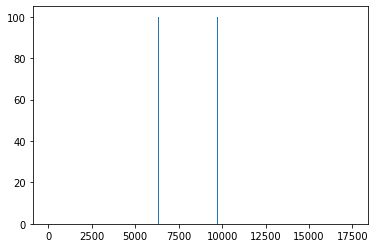

In [28]:
plt.bar(df['AGE'].value_counts(), 100)

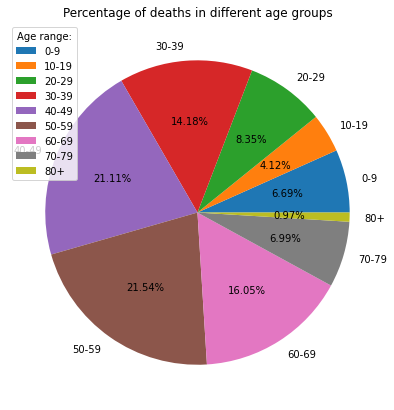

In [29]:
num=10
age = ['0-9', '10-19', '20-29',
        '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
counti = [0,0,0,0,0,0,0,0,0]
for x in df['AGE']:
    if(x<10):
        counti[0]+=1
    elif(x<20):
        counti[1]+=1
    elif(x<30):
        counti[2]+=1
    elif(x<40):
        counti[3]+=1
    elif(x<50):
        counti[4]+=1
    elif(x<60):
        counti[5]+=1
    elif(x<70):
        counti[6]+=1
    elif(x<80):
        counti[7]+=1
    else:
        counti[8]+=1
   
    
        
fig = plt.figure(figsize =(10, 7))
autotexts = plt.pie(counti, labels = age, autopct='%1.2f%%')
plt.legend(title = "Age range:")
plt.title("Percentage of deaths in different age groups")

plt.show()    

<AxesSubplot:title={'center':'District'}>

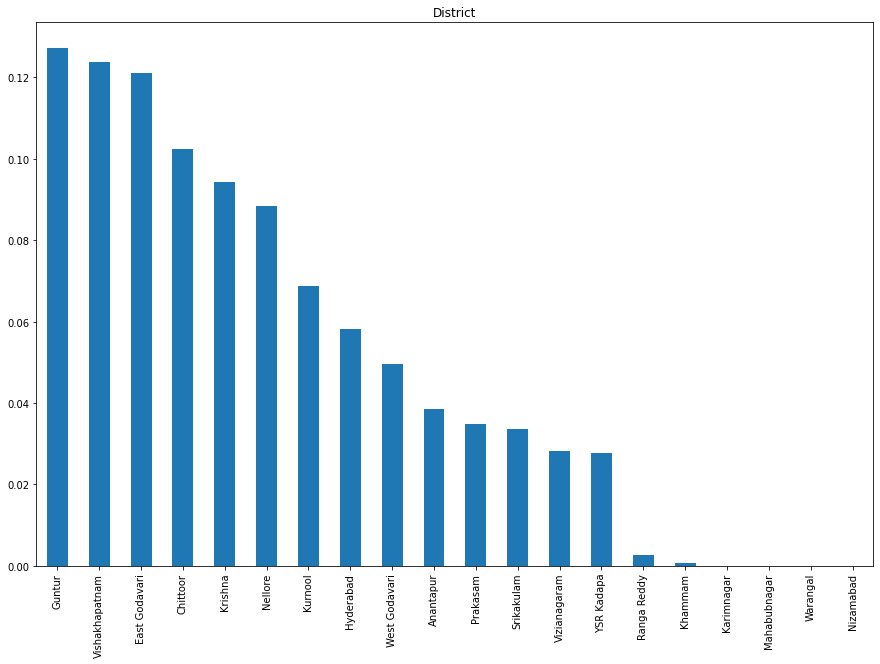

In [30]:
fig = plt.gcf()
fig.set_size_inches(15,10)
df['HOSP_DISTRICT'].value_counts(normalize=True).plot.bar(title= 'District')

In [31]:
male = 0
female = 0
for item in df['SEX']:
    if(item == 'M'):
        male+=1
    elif(item == 'F'):
        female+=1
print(str(male) + " are male and females are " + str(female))
print(str((male/(male+female))*100) + " msle and " + str((female/(male+female))*100))

285765 are male and females are 193876
59.578935078527486 msle and 40.421064921472514


<AxesSubplot:xlabel='CATEGORY_NAME'>

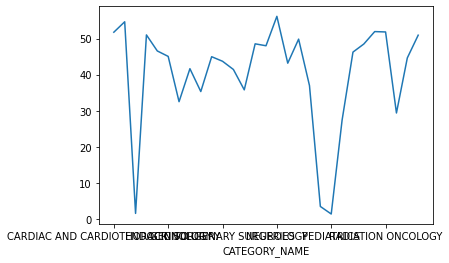

In [32]:
fg = df.groupby(['CATEGORY_NAME'])['AGE'].mean()
fg.plot()

In [33]:
df['SAME_DISTRICT'] = (df['DISTRICT_NAME'] == df['HOSP_DISTRICT'])
df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,SAME_DISTRICT
0,56,F,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,06-08-2013 00:00,07-09-2013 00:00,NO,NaN,D,True
1,37,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,08-08-2013 00:00,09-09-2013 00:00,NO,NaN,D,True
2,50,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D,True
3,45,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,24-08-2013 00:00,27-09-2013 00:00,NO,NaN,D,True
4,54,M,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,31-08-2013 00:00,02-10-2013 00:00,NO,NaN,D,True


In [34]:
districts = []
for i in df.index:
    if(df['SAME_DISTRICT'][i] and df['DISTRICT_NAME'][i] not in districts):
        districts.append(df['DISTRICT_NAME'][i])
print(districts) 

['Srikakulam', 'Kurnool', 'Guntur', 'Vishakhapatnam', 'Prakasam', 'East Godavari', 'Nellore', 'Krishna', 'YSR Kadapa', 'Chittoor', 'Vizianagaram', 'Anantapur', 'West Godavari']


In [35]:
df.describe()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479641.000000,479641.000000,479641.000000
mean,44.912376,30431.130915,27654.280316
std,18.961209,27441.764897,25951.957612
min,0.000000,5.000000,2.000000
25%,34.000000,12500.000000,12500.000000
50%,47.000000,25000.000000,23200.000000
75%,59.000000,35000.000000,30600.000000
max,107.000000,520000.000000,520000.000000


In [36]:
# mappings to standardize and clean the values
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}
# replace values using the defined mappings
sex_dist = df['SEX'].replace(mappings)
sex_dist.value_counts()

M    285765
F    193876
Name: SEX, dtype: int64

In [37]:

#**Hypothesis testing for mortality rate and sex**
#H0 : Both genders have same mortality rate
#H1 : Both genders have differnet mortality rate

import scipy.stats as stats

contigencytable = pd.crosstab(df['SEX'], df['Mortality Y / N'])
chi_sq_stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(contigencytable)


# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **Both genders have differnet mortality rate**')
else:
    print(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **Both genders have same mortality rate**')


As the p_value **(1.055905294125057e-29) < 0.05**, we reject the Null Hypothesis. Hence **Both genders have differnet mortality rate**


In [38]:
df.var()

/tmp/ipykernel_29870/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


AGE              3.595275e+02
PREAUTH_AMT      7.530505e+08
CLAIM_AMOUNT     6.735041e+08
SAME_DISTRICT    2.038187e-01
dtype: float64

In [39]:
# Most common surgery by district
for i in df['DISTRICT_NAME'].unique():
    print("\nDistrict: {}       \nDisease and Count: {}".format(i,df[df['DISTRICT_NAME']==i]["SURGERY"].     value_counts().head(1)))


District: Srikakulam       
Disease and Count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64

District: Kurnool       
Disease and Count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64

District: Vizianagaram       
Disease and Count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64

District: Guntur       
Disease and Count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64

District: Vishakhapatnam       
Disease and Count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64

District: West Godavari       
Disease and Count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64

District: Krishna       
Disease and Count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64

District: East Godavari       
Disease and Count: Surgical Correction Of Longbone Fracture    6998
Name: SURGERY, dtype: int64

District: Prakasam       
Dis

In [40]:
# group by surgery category to get mean statistics
df.groupby('CATEGORY_NAME').mean()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,SAME_DISTRICT
CATEGORY_NAME,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,51.764553,87052.165471,82487.123074,0.542499
CARDIOLOGY,54.652048,33215.140211,26731.893660,0.750980
COCHLEAR IMPLANT SURGERY,1.581081,520000.000000,516486.486486,0.108108
CRITICAL CARE,51.014649,69927.226196,50185.150797,0.862559
DERMATOLOGY,46.573171,28003.012195,21728.353659,0.524390
ENDOCRINOLOGY,45.066667,18981.376471,14875.437255,0.758824
ENT SURGERY,32.523884,15692.361074,14938.487190,0.813306
GASTROENTEROLOGY,41.662383,37085.464601,23798.118922,0.673973
GENERAL MEDICINE,35.330161,30347.573939,21840.991215,0.671303


In [41]:
# group by surgery category to get mean statistics
df.groupby('CATEGORY_NAME').var()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,SAME_DISTRICT
CATEGORY_NAME,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,261.013229,1.191427e+09,1.178856e+09,0.248199
CARDIOLOGY,147.498420,2.102947e+08,1.488728e+08,0.187019
COCHLEAR IMPLANT SURGERY,2.767308,0.000000e+00,2.751573e+08,0.097742
CRITICAL CARE,308.659268,3.350485e+08,3.603126e+08,0.118602
DERMATOLOGY,256.642728,1.239016e+07,4.317611e+07,0.252484
ENDOCRINOLOGY,313.932678,4.224767e+07,3.278254e+07,0.183370
ENT SURGERY,190.634937,3.232237e+06,4.792434e+06,0.151852
GASTROENTEROLOGY,185.415724,5.160467e+08,1.369197e+08,0.219789
GENERAL MEDICINE,263.482855,9.079312e+07,1.266015e+08,0.220817


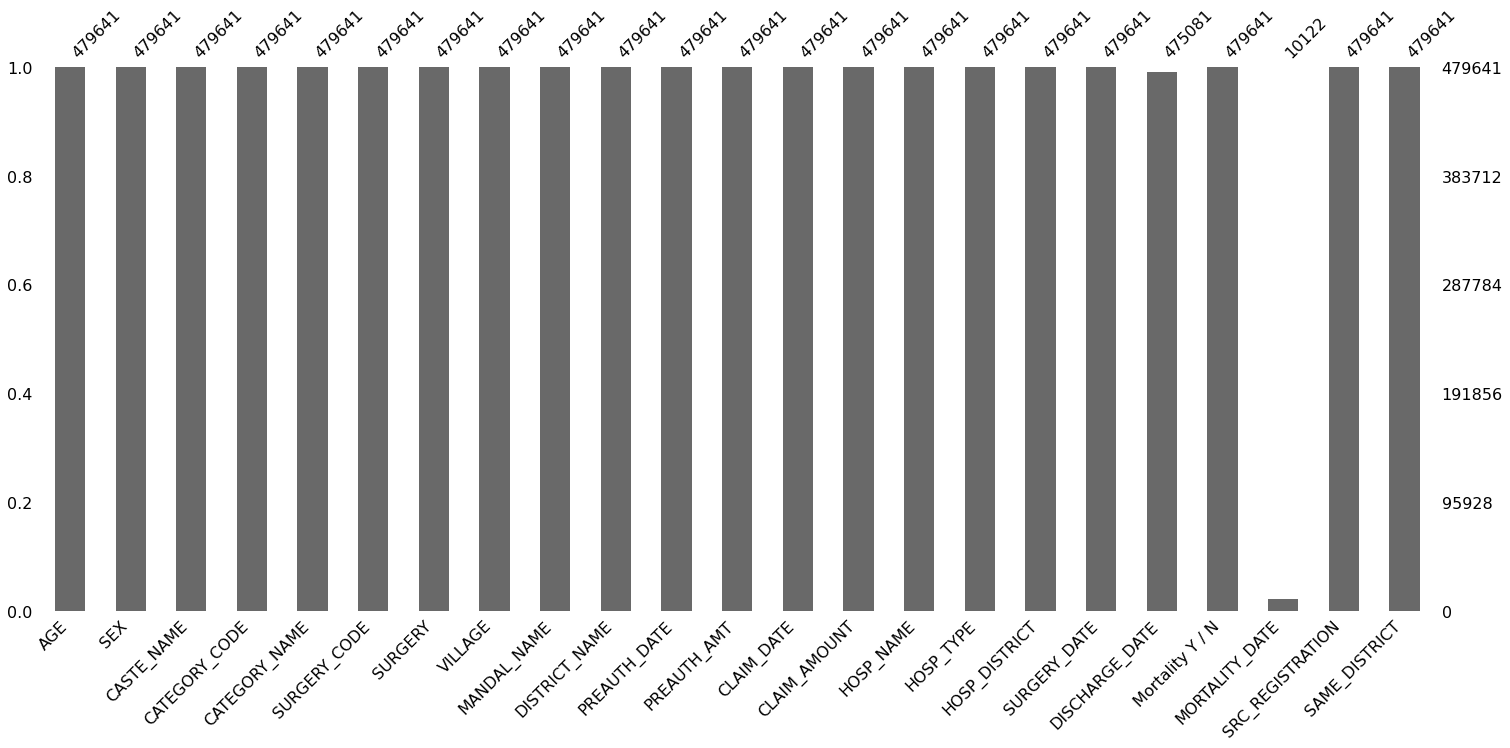

In [42]:
import missingno as msno
msno.bar(df)
plt.show()

/home/adilj/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PREAUTH_AMT', ylabel='Density'>

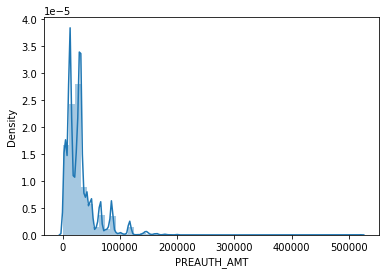

In [43]:
sns.distplot(df['PREAUTH_AMT'])

/home/adilj/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLAIM_AMOUNT', ylabel='Density'>

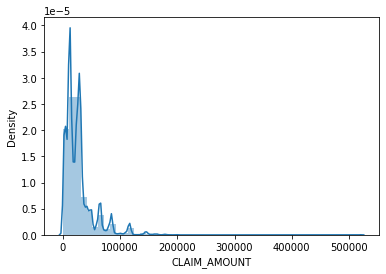

In [44]:
sns.distplot(df['CLAIM_AMOUNT'])

<AxesSubplot:>

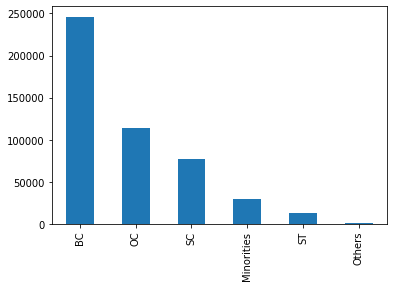

In [45]:
df['CASTE_NAME'].value_counts().plot.bar()

<AxesSubplot:>

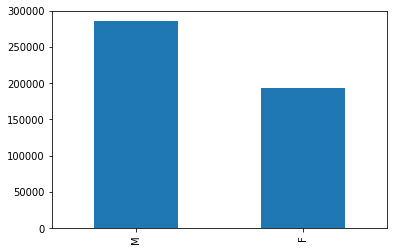

In [46]:
# plot the value counts of sex 
df['SEX'].value_counts().plot.bar()

/home/adilj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

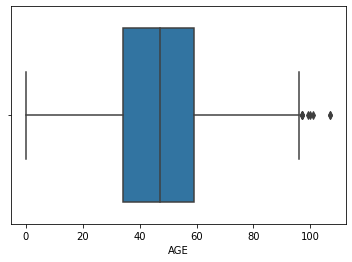

In [47]:
# better looking boxplot (using seaborn) for age variable
sns.boxplot(df['AGE'])

<AxesSubplot:xlabel='CATEGORY_NAME'>

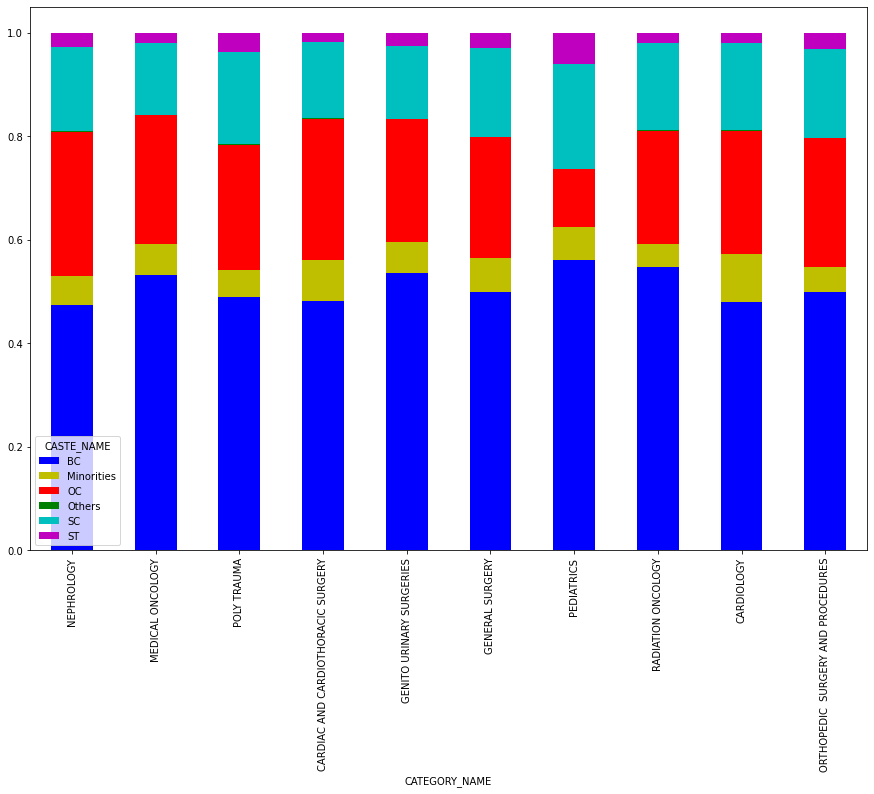

In [48]:
surg_caste = pd.crosstab(df['CATEGORY_NAME'],df['CASTE_NAME'])
surg_caste['total'] = surg_caste.sum(axis=1)
surgcaste = surg_caste.sort_values(by=['total'],ascending=False)[:10]
surgcaste.drop(columns=['total'],inplace=True)
surgcaste.div(surgcaste.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,10),color = ['b','y','r','g','c','m'])

Checking the correlation by plotting correlation plot.

Text(0.5, 1.0, 'Correlation ')

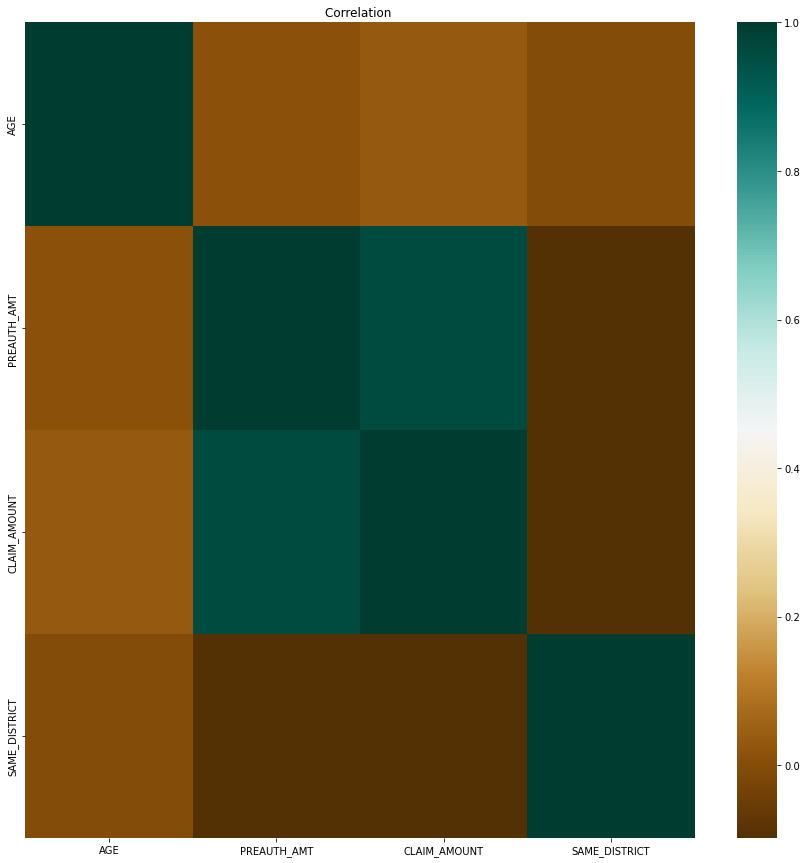

In [49]:
corr=df.corr()
fig = plt.figure(figsize=(15,15))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

From the correlation plot above, we can observe that the claim and preauthorization amounts have a low correlation with the age of the patient. Hence, we could say that the treatment cost or amount claimed are solely dependent on the surgery conducted and are independent of the age of the patient.

COUNT PLOT FOR ALL THE COLUMNS

/home/adilj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


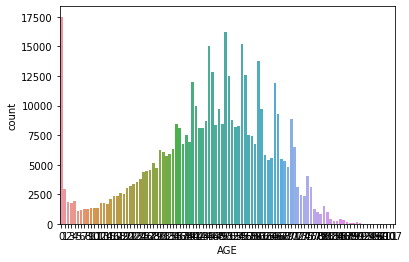

/home/adilj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


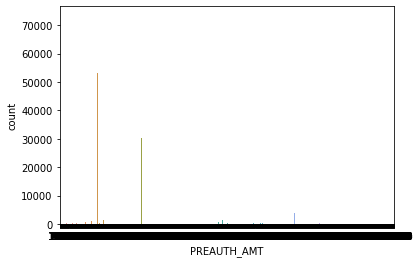

In [50]:
categorical_col = ['AGE','PREAUTH_AMT']
for i in categorical_col:
  sns.countplot(df[i])
  plt.xlabel(i)
  plt.show()

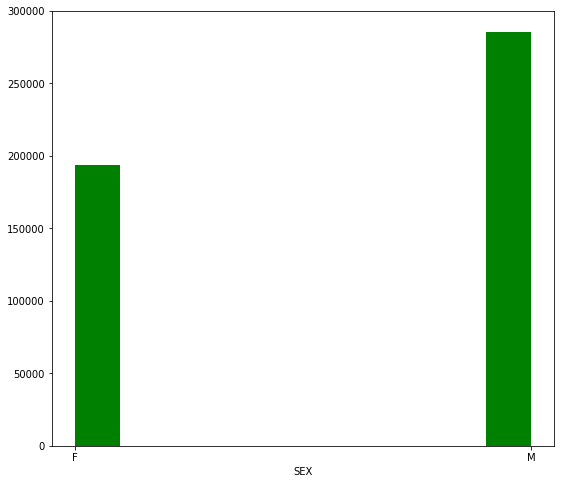

In [51]:
plot_coloumns = ['SEX', ]
for i in df[plot_coloumns]:
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='green',bins=10)
        plt.xlabel(i)
        plt.show()

Ho= The Claim amount in both government and private hospitalls is same

H1 = The Claim amount differs in Govt and private hospitals

In [52]:
# Htype = []
# for i in df['HOSP_TYPE']:
#   if i not in Htype:
#     Htype.append(i)
# Htype.sort()
# print(Htype)  
df['HOSP_TYPE'].unique()  


array(['G', 'C'], dtype=object)

In [53]:

#**Hypothesis testing for mortality rate and sex**
#H0 : Both genders have same mortality rate
#H1 : Both genders have differnet mortality rate

import scipy.stats as stats

contigencytable = pd.crosstab(df['SEX'], df['Mortality Y / N'])
chi_sq_stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(contigencytable)


# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **Both genders have differnet mortality rate**')
else:
    print(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **Both genders have same mortality rate**')


As the p_value **(1.055905294125057e-29) < 0.05**, we reject the Null Hypothesis. Hence **Both genders have differnet mortality rate**


In [54]:

#splitting the claim amounts coulumn into two variables X(corporate) & Y(Govt)
X=[]
Y=[]
A=[]
# def Average(i):
#     return i.mean()



for i in df.index:

  if(df['SURGERY_CODE'][i]=='S15.5.2'):
    if(df['HOSP_TYPE'][i]=='C'):
        X.append(df['PREAUTH_AMT'][i])
    else:
        Y.append(df['PREAUTH_AMT'][i])      
      

print(X)
print(Y)
#doing the independent t test 
t_stat, p_value = stats.ttest_ind(X,Y)

#Setting sigifcant level at 5%
if p_value < 0.05:  
    print(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **Claim amount for corporate differ significantly from government**')
else:
    print(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **claim amount for coorporate are same as of governemtn**')

[10520, 10520, 10520, 10730, 10520, 10520, 10520, 10520, 10520, 10520, 76956, 10730]
[10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 30766, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520, 10520]
As the p_value **(0.009577044503180226) < 0.05**, we reject the Null Hypothesis. Hence **Claim amount for corporate differ significantly from government**


In [55]:
df['Mortality Y / N'] = df['Mortality Y / N'].replace(['YES','NO'],[1, 0])
print(df['Mortality Y / N'])

0         0
1         0
2         0
3         0
4         0
         ..
479683    0
479684    0
479685    0
479686    0
479687    0
Name: Mortality Y / N, Length: 479641, dtype: int64


In [56]:
def parseSurCode(code):
    res = 0
    trace = code.split('.')
    if len(trace[0]) < 2:
        print("Errror")
    if trace[0][0] == 'S':
        res += 100000000000
    elif trace[0][0] == 'M':
        res += 200000000000
    else:
        res += 300000000000
    if len(trace) > 0: 
        if trace[0][1:].isdigit():
            res += int(trace[0][1:])*100000000
        else:
            res += 10000000000 + int(trace[0][2:])*100000000
            # print('first', trace[0])
    if len(trace) > 1:
        if trace[1].isdigit():
            res += int(trace[1])*1000000
        else:
            print('second', trace[1])  
    if len(trace) > 2:
        res += int(trace[2])*10000
    if len(trace) > 3:
        res += int(trace[3])*100
    if len(trace) > 4:
        res += int(trace[4])
    if(len(trace) > 5):
        print("Err!")
    return res
print(parseSurCode('M12.4.3.12.32'))

201204031232


In [57]:
# x = df.loc[:, ['AGE', 'SEX', 'SURGERY_CODE']]
# y = df.loc[:, df.columns == 'Mortality Y / N']
x = []
for i in df.index:
    # t.append([df['AGE'][i], df['SEX'][i], df['SURGERY_CODE'][i]])
    wer = []
    wer.append(df['AGE'][i])
    if df['SEX'][i] == 'M':
        wer.append(0)
    else:
        wer.append(1)
    wer.append(parseSurCode(df['SURGERY_CODE'][i]))
    x.append(wer)
# print(df['Mortality Y / N'].tolist())
x = np.array(x).reshape(479641, 3)
y = df['Mortality Y / N'].to_numpy().ravel()


x = pd.DataFrame(x, columns =['AGE', 'SEX', 'SURGERY_CODE'])
# print(x) 
y = pd.DataFrame(y, columns =['Mortality Y / N'])
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns
os_data_x,os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x, columns = columns )
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Mortality Y / N'])
# we can Check the numbers of our data
print("Length of oversampled data is ", len(os_data_x))
print("Number of alive in oversampled data", len(os_data_y[os_data_y['Mortality Y / N'] == 0]))
print("Number of deaths in oversampled data", len(os_data_y[os_data_y['Mortality Y / N'] == 1]))
print("Proportion of alive in oversampled data is ", len(os_data_y[os_data_y['Mortality Y / N'] == 0])/len(os_data_x))
print("Proportion of dead in oversampled data is ", len(os_data_y[os_data_y['Mortality Y / N'] == 1])/len(os_data_x))
print(os_data_x, os_data_y)

Length of oversampled data is  657280
Number of alive in oversampled data 328640
Number of deaths in oversampled data 328640
Proportion of alive in oversampled data is  0.5
Proportion of dead in oversampled data is  0.5
        AGE  SEX  SURGERY_CODE
0        56    0  100302070000
1        46    1  200605000000
2        60    1  100101050500
3         3    1  100702080200
4        55    1  200605000000
...     ...  ...           ...
657275   48    1  200605000000
657276   57    0  200108000000
657277   39    0  101004010100
657278    0    0  200401140000
657279   62    0  100103040200

[657280 rows x 3 columns]         Mortality Y / N
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
657275                1
657276                1
657277                1
657278                1
657279                1

[657280 rows x 1 columns]


In [58]:
from sklearn.model_selection import train_test_split
# X, y = np.arange(10).reshape((5, 2)), range(5)
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=123,stratify=y)

# x = [[21, 'M', 'M65'], [32, 'F', 'M54'], [54, 'F', 'W34'], [12, 'M', 'M32'], [43, 'M', 'E32']]
# y = [0, 0, 1, 1, 0]
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=123,stratify=y)
# print(x_train, y_train, x_test, y_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# lr = LogisticRegression(penalty='l2',C=0.1)
# lr.fit(x_train,y_train)
# x = []
# for i in df.index:
#     # t.append([df['AGE'][i], df['SEX'][i], df['SURGERY_CODE'][i]])
#     wer = []
#     wer.append(df['AGE'][i])
#     if df['SEX'][i] == 'M':
#         wer.append(0)
#     else:
#         wer.append(1)
#     wer.append(parseSurCode(df['SURGERY_CODE'][i]))
#     x.append(wer)
# print(df['Mortality Y / N'].tolist())
# x = np.array(x).reshape(479641, 3)
# y = df['Mortality Y / N'].to_numpy().ravel()
# print(x)
# print(x.shape, y.shape)
# x = [[21, 'M', 'M65'], [32, 'F', 'M54'], [54, 'F', 'W34'], [12, 'M', 'M32'], [43, 'M', 'E32']]
# y = [0, 0, 1, 1, 0]
x = np.array(x).reshape(479641, 3)
y = df['Mortality Y / N'].to_numpy().ravel()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)
# print(x_train, y_train, x_test, y_test)
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)

y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test, zero_division=0))


Train Set Accuracy:97.897033886526
Test Set Accuracy:97.86758512563485

Confusion Matrix:
[[117354   2557]
 [     0      0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    119911
           1       0.00      0.00      0.00         0

    accuracy                           0.98    119911
   macro avg       0.50      0.49      0.49    119911
weighted avg       1.00      0.98      0.99    119911



<AxesSubplot:xlabel='AGE', ylabel='Mortality Y / N'>

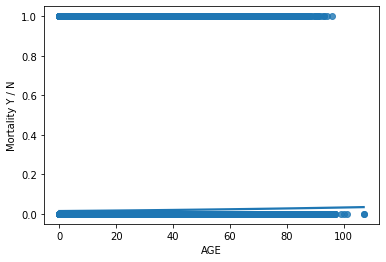

In [59]:
x = pd.DataFrame(x, columns =['AGE', 'SEX', 'SURGERY_CODE'])
y = pd.DataFrame(y, columns =['Mortality Y / N'])
# for i in ['AGE', 'SEX', 'SURGERY_CODE']:
sns.regplot(x = x['AGE'], y = y['Mortality Y / N'], data= df, logistic = True, ci = None)

In [60]:
from sklearn.model_selection import train_test_split
# X, y = np.arange(10).reshape((5, 2)), range(5)
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=123,stratify=y)

# x = [[21, 'M', 'M65'], [32, 'F', 'M54'], [54, 'F', 'W34'], [12, 'M', 'M32'], [43, 'M', 'E32']]
# y = [0, 0, 1, 1, 0]
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=123,stratify=y)
# print(x_train, y_train, x_test, y_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# lr = LogisticRegression(penalty='l2',C=0.1)
# lr.fit(x_train,y_train)
# x = []
# for i in df.index:
#     # t.append([df['AGE'][i], df['SEX'][i], df['SURGERY_CODE'][i]])
#     wer = []
#     wer.append(df['AGE'][i])
#     if df['SEX'][i] == 'M':
#         wer.append(0)
#     else:
#         wer.append(1)
#     wer.append(parseSurCode(df['SURGERY_CODE'][i]))
#     x.append(wer)
# print(df['Mortality Y / N'].tolist())
# x = np.array(x).reshape(479641, 3)
# y = df['Mortality Y / N'].to_numpy().ravel()
# print(x)
# print(x.shape, y.shape)
# x = [[21, 'M', 'M65'], [32, 'F', 'M54'], [54, 'F', 'W34'], [12, 'M', 'M32'], [43, 'M', 'E32']]
# y = [0, 0, 1, 1, 0]
x = np.array(os_data_x).reshape(657280, 3)
y = os_data_y.to_numpy().ravel()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)
# print(x_train, y_train, x_test, y_test)
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)

y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test, zero_division=0))

Train Set Accuracy:49.9663258682246
Test Set Accuracy:50.10102239532619

Confusion Matrix:
[[    0     0]
 [81994 82326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67    164320

    accuracy                           0.50    164320
   macro avg       0.50      0.25      0.33    164320
weighted avg       1.00      0.50      0.67    164320



<AxesSubplot:xlabel='AGE', ylabel='Mortality Y / N'>

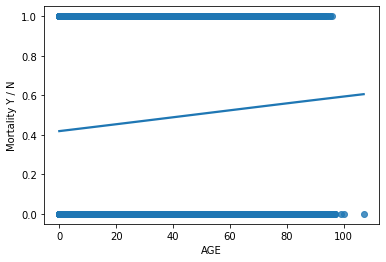

In [61]:
x = pd.DataFrame(x, columns =['AGE', 'SEX', 'SURGERY_CODE'])
y = pd.DataFrame(y, columns =['Mortality Y / N'])
# for i in ['AGE', 'SEX', 'SURGERY_CODE']:
sns.regplot(x = x['AGE'], y = y['Mortality Y / N'], data= df, logistic = True, ci = None)

In [62]:
data_final_vars = df.columns.values.tolist()
y = ['Mortality Y / N']
x = [i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

TypeError: __init__() takes 2 positional arguments but 3 were given